# Importing all the required modules

In [2]:
import pickle
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Opening the data files using pickle and splitting the train data into 20 random sets

In [17]:
with open('./data/test_dataset.pickle', 'rb') as f:
    testData = pickle.load(f)

with open('./data/train_dataset.pickle', 'rb') as f:
    trainData = pickle.load(f)
    
np.random.shuffle(trainData)

splitData = np.split(trainData, 20) #splitData has 20 arrays of 40 (x,y) pairs each
trainX = []
trainY = []
for i in range(20):
    trainX.append(splitData[i][:,0])
    trainX[i] = [[val] for val in trainX[i]]
    trainY.append(splitData[i][:, 1])

#trainX has 20 arrays of 40 [x] each
testX = testData[:, 0]
testX = [[val] for val in testX]
testY = testData[:, 1]

# Creating polynomials upto degree 15

In [3]:
trainXBar = []
testXBar = []

# we are preprocessing the training and test datasets here
# trainXBar contains 15 arrays, one for each degree polynomial and each array has 20 polynomials

for i in range (15):
    trainXBar.append([])
    for j in range (20):
        trainXBar[i].append(PolynomialFeatures(i+1).fit_transform(trainX[j]))

for i in range (15):
    testXBar.append(PolynomialFeatures(i+1).fit_transform(testX))

# Making 300 data models

In [4]:
dataModels = []
        
for i in range (15):
    dataModels.append([])
    for j in range (20):
        dataModels[i].append(LinearRegression().fit(trainXBar[i][j], trainY[j]))

In [5]:
# here we will apply 300 models on the 300 test data to get 300 predictions

yPred = []
yTotal = []
avgYPred = []
for i in range (15):
    yTotal.append(0)
    yPred.append([])
    for j in range (20):
        yPred[i].append(dataModels[i][j].predict(testXBar[i]))
        yTotal[i] += yPred[i][j]
        
    avgYPred.append(yTotal[i] / 20)
yPred = np.array(yPred)

In [6]:
# let f^(x) = gx  => stores the predicted values
gx = np.array(avgYPred)

# stores the actual values
fx = np.array(testY)

xaxis = []
biasArr = []
bias2Arr = [] # bias squared
variance_array = []
temp = []
mseArr = []
irreduceable_error_array = [] # mean squared error - bias squared - variance
for i in range (15):
    xaxis.append(i)
    bias_2 = np.mean((gx[i] - fx) ** 2)
    bias2Arr.append(bias_2)
    bias = np.mean(np.abs(gx[i] - fx))
    biasArr.append(bias)
    variance = np.mean((yPred[i-1] - gx[i].T) ** 2 )
    variance_array.append(variance)
    mse = np.mean((yPred[i] - fx) ** 2 )
    mseArr.append(mse)
    irreduceable_error = mse - bias_2 - variance
    irreduceable_error_array.append(irreduceable_error)

In [7]:
ie_table = pd.DataFrame(np.array([irreduceable_error_array]).T)
ie_table.index = range(1, 16)
ie_table.columns = ["Irreduceable Error"]
ie_table.round(20)

,Irreduceable Error
1,-9.003751
2,-0.104412
3,-0.007845
4,-0.000242
5,0.000093
6,0.000112
7,0.000289
8,0.000065
9,0.000864
10,0.001498


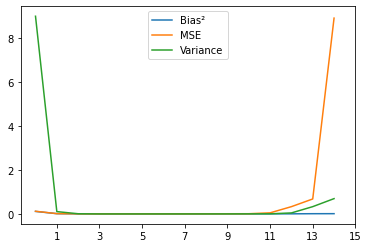

In [8]:
plt.plot(xaxis, bias2Arr, label = "Bias²")
plt.plot(xaxis, mseArr, label = "MSE")
plt.plot(xaxis, variance_array, label = "Variance") 
plt.xticks(np.arange(1, 16, step=2))
plt.legend()

In [9]:
bias_variance_table = pd.DataFrame(np.array([biasArr, variance_array]).T)
bias_variance_table.index = range(1, 16)
bias_variance_table.columns = ["Bias", "Variance"]
bias_variance_table.round(2)

,Bias,Variance
1,0.27,9.01
2,0.09,0.11
3,0.03,0.01
4,0.02,0.00
5,0.02,0.00
6,0.02,0.00
7,0.03,0.00
8,0.03,0.00
9,0.03,0.00
10,0.03,0.00


In [10]:
mse_table = pd.DataFrame(np.array([mseArr]).T)
mse_table.index = range(1, 16)
mse_table.columns = ["MSE"]
mse_table.round(2)

,MSE
1,0.12
2,0.01
3,0.01
4,0.00
5,0.00
6,0.00
7,0.01
8,0.01
9,0.01
10,0.01


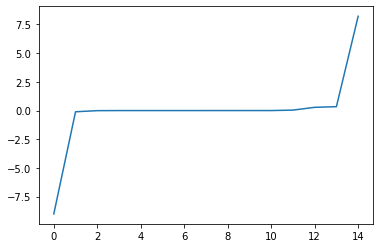

In [11]:
plt.plot(xaxis, irreduceable_error_array, label = "Irreduceable Error")
plt.show()

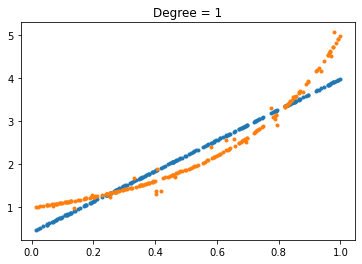

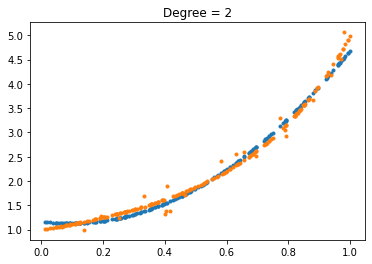

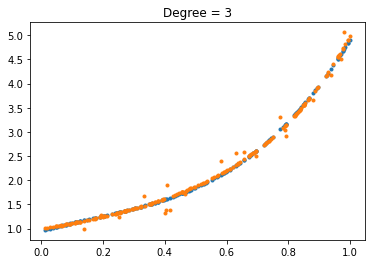

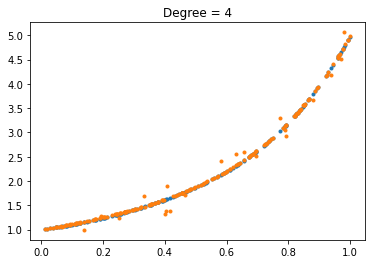

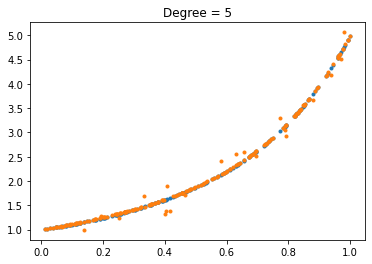

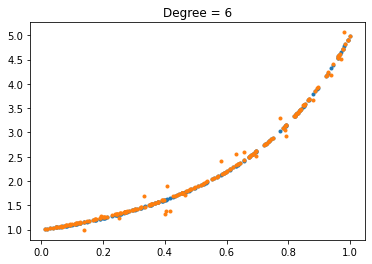

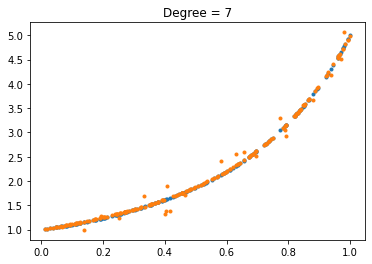

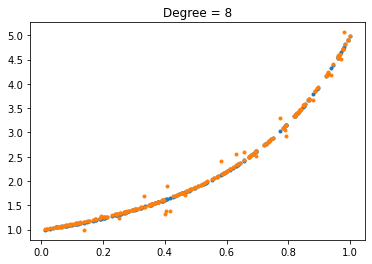

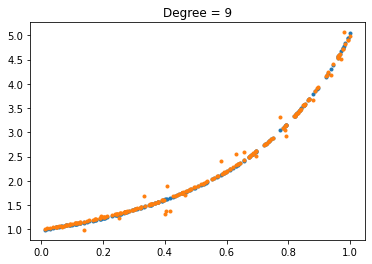

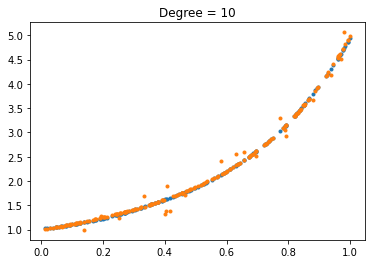

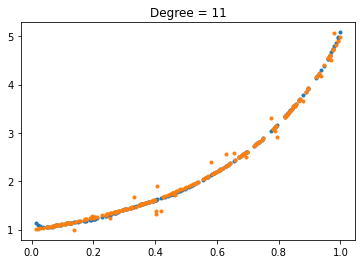

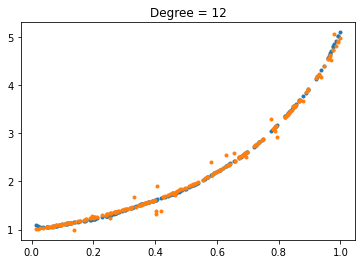

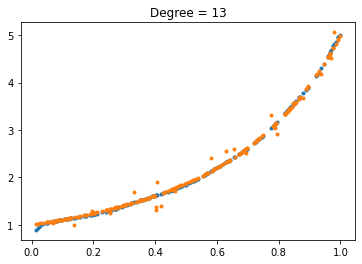

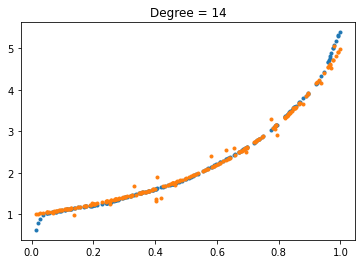

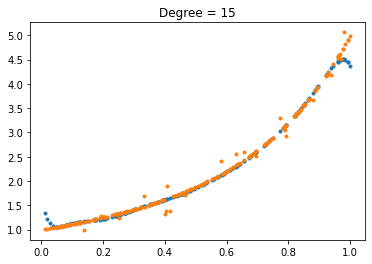

In [12]:
for i in range(15):
    plt.title("Degree = " + str(i+1))
    plt.plot(testX, gx[i], ".")
    plt.plot(testX, fx, ".")
    plt.show()